In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
# Read the dataset
inputfile = pd.read_csv('ASD_Patient_Dataset.csv')
display(inputfile)


,Patient ID,Age,Gender,Smiling,Beating,Shouting,Repetitive Behaviour,Sensory,Delayed Speech,Social Interaction,Parents has ASD,Class/ASD
0,1,7,m,0,0,0,0,1,1,0,0,0
1,2,9,m,0,1,0,1,0,0,1,1,0
2,3,9,m,1,1,1,1,1,1,1,1,1
3,4,15,m,0,1,1,0,1,0,1,0,0
4,5,5,m,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,514,3,m,1,0,0,1,1,1,0,1,1
514,515,14,f,0,0,1,1,0,0,0,0,0
515,516,1,m,0,0,1,0,1,0,1,1,0
516,517,7,m,0,1,1,0,1,1,1,1,1


In [3]:
print("Variables used in the Dataset")
display(inputfile.info())

Variables used in the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            518 non-null    int64 
 1   Age                   518 non-null    int64 
 2   Gender                518 non-null    object
 3   Smiling               518 non-null    int64 
 4   Beating               518 non-null    int64 
 5   Shouting              518 non-null    int64 
 6   Repetitive Behaviour  518 non-null    int64 
 7   Sensory               518 non-null    int64 
 8   Delayed Speech        518 non-null    int64 
 9   Social Interaction    518 non-null    int64 
 10  Parents has ASD       518 non-null    int64 
 11  Class/ASD             518 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 48.7+ KB


None

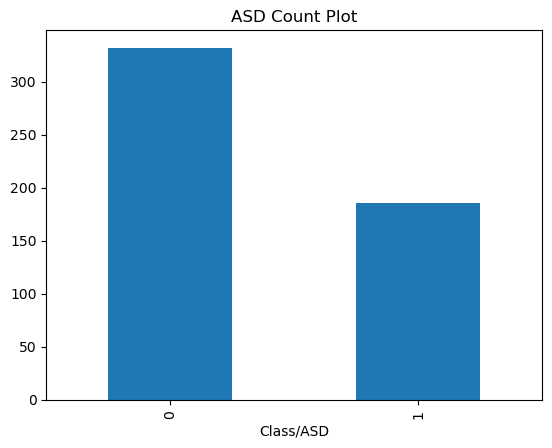

In [4]:
#graph of 0 (No ASD) and 1 (ASD) number of records found in dataset
label = inputfile.groupby('Class/ASD').size()
label.plot(kind="bar")
plt.title("ASD Count Plot")
plt.rcParams["figure.figsize"]= [6,4]
plt.show()

In [17]:
# Step 3: Define x (input columns) and y (output column)
numeric_columns = ['Age', 'Smiling','Beating', 'Shouting', 'Repetitive Behaviour', 'Sensory', 'Delayed Speech', 'Social Interaction', 'Parents has ASD' ]
categorical_columns = ['Gender']
x = inputfile[numeric_columns + categorical_columns]
y = inputfile['Class/ASD']


In [18]:
# Step 4: Separate numeric and categorical data
numeric_data = x[numeric_columns].values
categorical_data = x[categorical_columns]

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(categorical_data)

# Combine numeric and encoded categorical data
x_combined = np.hstack([numeric_data, categorical_encoded])
print("Shape of numeric data:", numeric_data.shape)
print("Shape of categorical encoded data:", categorical_encoded.shape)
print("Shape of x after combining:", x_combined.shape)

#displaying traing and test size
print("Dataset Size : "+str(x_combined.shape[0]))



Shape of numeric data: (518, 9)
Shape of categorical encoded data: (518, 2)
Shape of x after combining: (518, 11)
Dataset Size : 518


In [19]:
# Step 5: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)
#displaying traing and test size
print("Dataset Size : "+str(x_combined.shape[0]))
print("Training Size : "+str(x_train.shape[0]))
print("Testing Size : "+str(x_test.shape[0]))

Dataset Size : 518
Training Size : 414
Testing Size : 104


In [20]:
#function to calculate all metrics 
def calculateMetrics(algorithm, predict, y_test):
    a = accuracy_score(y_test,predict)*100
    #accuracy.append(a)
    print(algorithm+" Accuracy  :  "+str(a))
    
    labels = ["No", "Yes"]
    conf_matrix = confusion_matrix(y_test, predict) 
    #plt.figure(figsize =(6, 6)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Decision Tree Accuracy  :  79.8076923076923


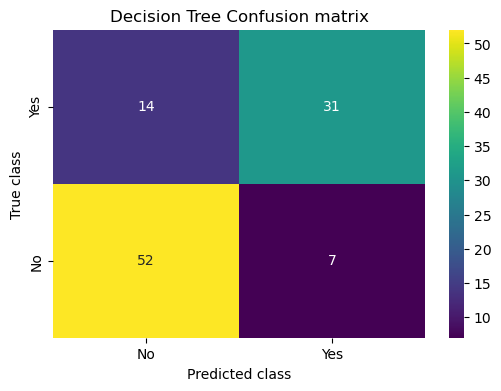

In [21]:
# Step 6: Train models and evaluate performance
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(x_test))
predict= dt_model.predict(x_test)
calculateMetrics("Decision Tree", predict, y_test)

Support Vector Machine Accuracy  :  78.84615384615384


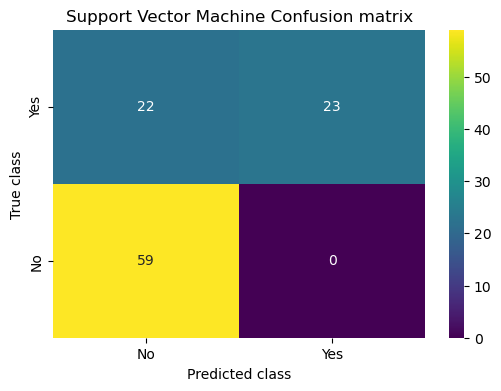

In [22]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
predict= svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_model.predict(x_test))
calculateMetrics("Support Vector Machine", predict, y_test)

Logistic Regression Accuracy  :  100.0


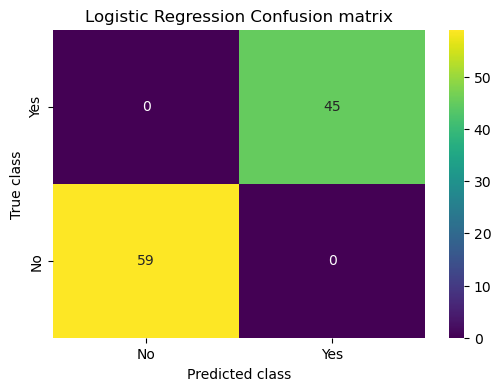

In [23]:

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(x_test))
predict=lr_model.predict(x_test)
calculateMetrics("Logistic Regression", predict, y_test)

Model Accuracies: {'Decision Tree': 0.7980769230769231, 'SVM': 0.7884615384615384, 'Logistic Regression': 1.0}


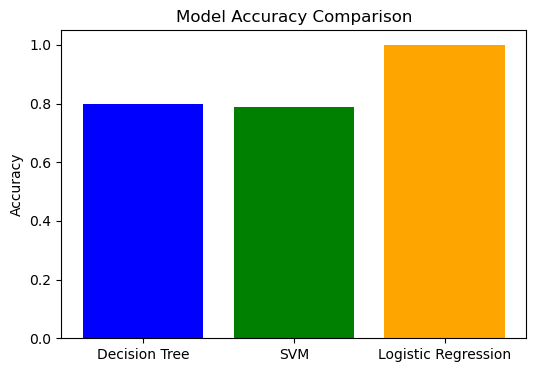

In [24]:


# Step 7: Compare accuracies
accuracies = {'Decision Tree': dt_accuracy, 'SVM': svm_accuracy, 'Logistic Regression': lr_accuracy}
print("Model Accuracies:", accuracies)

# Plot the comparison bar graph
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [28]:

# Step 8: Use the best model for prediction
best_model = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model}")

# Take user input for prediction
user_input = {
    'Age': float(input("Enter age: ")),
    'Gender': input("Enter gender (m/f): "),
    'Smiling': float(input("Smiling? (0/1): ")),
    'Beating': float(input("Beating? (0/1): ")),
    'Shouting': float(input("Shouting? (0/1): ")),
    'Repetitive Behaviour': float(input("Repetitive Behaviour? (0/1): ")),
    'Sensory': float(input("Sensory? (0/1): ")),
    'Delayed Speech': float(input("Delayed Speech? (0/1): ")),
    'Social Interaction': float(input("Social Interaction? (0/1): ")),
    'Parents has ASD': float(input("Parents has ASD? (0/1): ")),

}

# Prepare user data for prediction
user_df = pd.DataFrame([user_input])
numeric_user_data = user_df[numeric_columns].values
categorical_user_data = user_df[categorical_columns]
user_categorical_encoded = encoder.transform(categorical_user_data)
user_combined = np.hstack([numeric_user_data, user_categorical_encoded])

# Predict using the best model
if best_model == 'Decision Tree':
    prediction = dt_model.predict(user_combined)
elif best_model == 'SVM':
    prediction = svm_model.predict(user_combined)
elif best_model == 'Logistic Regression':
    prediction = lr_model.predict(user_combined)

print("ASD Prediction:", "ASD" if prediction[0] == 1 else "NO ASD")


Best Model: Logistic Regression
Enter age: 5
Enter gender (m/f): f
Smiling? (0/1): 1
Beating? (0/1): 1
Shouting? (0/1): 1
Repetitive Behaviour? (0/1): 1
Sensory? (0/1): 1
Delayed Speech? (0/1): 0
Social Interaction? (0/1): 0
Parents has ASD? (0/1): 0
ASD Prediction: ASD


#